In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import json
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<span style="color:black; font-weight:700;font-size:18px"> Διαβάζουμε το αρχείο phily_businesses.csv και κρατάμε μόνο όσες επιχειρήσεις έχουν στο categories feature την λέξη Restaurant. </span>

In [13]:
phily = pd.read_csv("phily_businesses.csv")

# get all businesses that have restaurants in category
rest = phily[phily['categories'].str.contains('Restaurant', na=False)]
print("How many restaurants:",len(rest.index))
print("Columns:",rest.columns)

How many restaurants: 5854
Columns: Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')


<span style="color:black; font-weight:700;font-size:18px"> Βρίσκουμε από τα εστιατόρια ποια από αυτά περιέχουν την μόνο την λέξη 'Japanese' και όχι 'Italian'/'Burger'. Επαναλαμβάνουμε την διαδικασία για 'Italian' και 'Burger'. </span>

In [14]:
# get all businesses that have japanese in category
restF = rest[rest['categories'].str.contains('Japanese', na=False) &
            ~rest['categories'].str.contains('Italian', na=False) &
            ~rest['categories'].str.contains('Burger', na=False)]
print(len(restF.index))

# get all businesses that have italian in category
restIt = rest[rest['categories'].str.contains('Italian', na=False) &
            ~rest['categories'].str.contains('Japanese', na=False) &
            ~rest['categories'].str.contains('Burger', na=False)]
print(len(restIt.index))

# get all businesses that have burger in category
restbur = rest[rest['categories'].str.contains('Burger', na=False) &
            ~rest['categories'].str.contains('Japanese', na=False) &
            ~rest['categories'].str.contains('Italian', na=False)]
print(len(restbur.index))

235
490
348


<span style="color:black; font-weight:700;font-size:18px"> Τώρα από τα ιαπωνικά εστιατόρια του DataFrame restF, κρατάμε όσα από αυτά δεν βρίσκονται στα DataFrame των ιταλικών και των burger εστιατορίων. </span>

In [15]:
restF = restF[~restF['business_id'].isin(restIt['business_id'])].dropna()
print(len(restF.index))
restF = restF[~restF['business_id'].isin(restbur['business_id'])].dropna()
print(len(restF.index))

204
204


<span style="color:black; font-weight:700;font-size:18px"> Το ίδιο για τα ιταλικά, κρατάμε όσα δεν βρίσκονται στα DataFrame των ιαπωνικών και των burger εστιατορίων. </span>

In [16]:
restIt = restIt[~restIt['business_id'].isin(restF['business_id'])].dropna()
print(len(restIt.index))
restIt = restIt[~restIt['business_id'].isin(restbur['business_id'])].dropna()
print(len(restIt.index))

431
431


<span style="color:black; font-weight:700;font-size:18px"> Και τέλος το ίδιο για τα burger εστιατόρια, κρατάμε όσα δεν βρίσκονται στα DataFrame των ιαπωνικών και των ιταλικών εστιατορίων. </span>

In [17]:
restbur = restbur[~restbur['business_id'].isin(restIt['business_id'])].dropna()
print(len(restbur.index))
restbur = restbur[~restbur['business_id'].isin(restF['business_id'])].dropna()
print(len(restbur.index))

316
316


<span style="color:black; font-weight:700;font-size:18px"> Ενώνουμε τα τρία DataFrames restF, restIt, restbur και έχουμε όσα εστιατόρια λέει η εκφώνηση. </span>

In [18]:
restF = restF.append(restIt)
restF = restF.append(restbur)
print(len(restF.index))

951


<span style="color:black; font-weight:700;font-size:18px"> Μετατρέπουμε τα categories 'Japanese','Italian','Burger' σε 0,1,2. </span>

In [19]:
restF['category_label'] = restF['categories'].apply(lambda x: 0 if('Japanese' in x)
                                                   else (1 if('Italian' in x)
                                                   else 2))

restF['category_label']

1        0
15       0
104      0
165      0
282      0
        ..
14262    2
14354    2
14365    2
14425    2
14437    2
Name: category_label, Length: 951, dtype: int64

<span style="color:black; font-weight:700;font-size:18px"> Παίρνουμε όσα reviews έχουν γίνει στα εστιατόρια που κρατήσαμε και τα αποθηκεύουμε σε ένα αρχείο για πρακτικούς λόγους.</span>

In [ ]:
data = []
reviews = []
#phillyBusiness = np.array(df.business_id.values)
i = 0
wantedRest = restF["business_id"]
#print(wantedRest)
realCounter = 0
with open('yelp_academic_dataset_review.json', encoding='utf-8') as f:
    for line in f:
        #data.append(json.loads(line))
        #print(data[i])
        line = eval(line)
        #print(line["business_id"], type(line["business_id"]))
        if(wantedRest.str.contains(line["business_id"]).any()):
            reviews.append(line)
            #print("Found one! at:",i)
        i += 1
        if(i%10000 == 0): print(i)


In [ ]:
revDf = pd.DataFrame(reviews)

# save to csv file
revDf.to_csv('reviewsRest.csv', encoding='utf-8', index=False)

In [20]:
revDf = pd.read_csv('reviewsRest.csv')

<span style="color:black; font-weight:700;font-size:18px"> Αυτήν την στιγμή έχουμε ένα DataFrame με κάθε business_id και το review του. Κάνουμε groupby με τα business_id, κρατάμε σε μια λίστα τα business_ids και δημιουργούμε μια νέα στήλη στην οποία έχουμε κάνει join κάθε review της επιχείρησης. </span>

In [21]:
bus_groups = revDf.groupby('business_id')
business_names = []
text_joined = []

for business_id, bus_data in bus_groups:
    #print(business_id)
    business_names.append(business_id)
    #print(bus_data['text'])
    text_joined.append(' '.join(bus_data["text"]))
    

<span style="color:black; font-weight:700;font-size:18px"> Δημιουργούμε ένα DataFrame bus_reviews με δύο στήλες, στην πρώτη το business_id και στην άλλη όλα τα review ενωμένα. </span>

In [22]:
bus_reviews = pd.DataFrame([])
bus_reviews['business_id'] = pd.Series(business_names)
bus_reviews['text'] = pd.Series(text_joined)
bus_reviews.head

<bound method NDFrame.head of                 business_id                                               text
0    -AbzJTLQdbdQrhRzQLgsKA  Kingyo has summer appetizer specials for $3.00...
1    -HxLFWKVgXSU8JlR21PBkg  "Carluccio's: Way Delish"\n\nEver find yoursel...
2    -LmhsdQproqCf5EQoD06rQ  Down in south Philly for a meeting at my daugh...
3    -MkngKKkTIVfnUbq2S1ucQ  Dee-frickin'-licious thick crust pizza!!! I or...
4    -PMXnNJ1D67NkAupRHNkpQ  I've always preferred domino's over pizza hut!...
..                      ...                                                ...
946  zUJMvjK6aBeQtVCowZ85-w  Excelent! Food is wondeful, hot, and fresh! Th...
947  zeounyPVXFZEz1c9KtptLA  Pizza, wings, steaks are good.. chicken finger...
948  zgX8sYCRGVJ9M5LETpJ60A  I popped in there one afternoon to pick up som...
949  zqisPpgCURrgLf4TVnI8RQ  This review is for poke bowl. Very fresh salad...
950  zzyx5x0Z7xXWWvWnZFuxlQ  Maybe the pizza is good here... but I can real...

[951 rows x 2 columns

<span style="color:black; font-weight:700;font-size:18px"> Τώρα για να αναθέσουμε το category σε κάθε business_id ταξινομούμε το restF DataFrame και θέτουμε στο bus_review ως νέα στήλη την στήλη category_label από το restF. </span>

In [23]:
restF.sort_values(by=['business_id'], inplace=True)
bus_reviews['category'] = restF['category_label'].tolist()
bus_reviews.head

<bound method NDFrame.head of                 business_id  \
0    -AbzJTLQdbdQrhRzQLgsKA   
1    -HxLFWKVgXSU8JlR21PBkg   
2    -LmhsdQproqCf5EQoD06rQ   
3    -MkngKKkTIVfnUbq2S1ucQ   
4    -PMXnNJ1D67NkAupRHNkpQ   
..                      ...   
946  zUJMvjK6aBeQtVCowZ85-w   
947  zeounyPVXFZEz1c9KtptLA   
948  zgX8sYCRGVJ9M5LETpJ60A   
949  zqisPpgCURrgLf4TVnI8RQ   
950  zzyx5x0Z7xXWWvWnZFuxlQ   

                                                  text  category  
0    Kingyo has summer appetizer specials for $3.00...         0  
1    "Carluccio's: Way Delish"\n\nEver find yoursel...         1  
2    Down in south Philly for a meeting at my daugh...         0  
3    Dee-frickin'-licious thick crust pizza!!! I or...         1  
4    I've always preferred domino's over pizza hut!...         1  
..                                                 ...       ...  
946  Excelent! Food is wondeful, hot, and fresh! Th...         0  
947  Pizza, wings, steaks are good.. chicken finger...       

<span style="color:black; font-weight:700;font-size:18px"> Κάνουμε drop όσες γραμμές είναι null, προληπτικά. </span>

In [24]:
bus_reviews['text'].dropna(inplace=True)
print("Number of lines after dropna:",len(bus_reviews.index))

Number of lines after dropna: 951


<span style="color:black; font-weight:700;font-size:18px"> Τώρα με την χρήση lambda function και την λίστα από τα stopwords που κατεβάσαμε στην αρχή, αν μια λέξη δεν περιέχεται στο stopwords list, την κρατάμε. Το νέο κείμενο που δημιουργείται, κρατιέται σε μια νέα στήλη. </span>

In [25]:
stop = stopwords.words('english')
bus_reviews['text_without_sw'] = bus_reviews['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
bus_reviews.head

<bound method NDFrame.head of                 business_id  \
0    -AbzJTLQdbdQrhRzQLgsKA   
1    -HxLFWKVgXSU8JlR21PBkg   
2    -LmhsdQproqCf5EQoD06rQ   
3    -MkngKKkTIVfnUbq2S1ucQ   
4    -PMXnNJ1D67NkAupRHNkpQ   
..                      ...   
946  zUJMvjK6aBeQtVCowZ85-w   
947  zeounyPVXFZEz1c9KtptLA   
948  zgX8sYCRGVJ9M5LETpJ60A   
949  zqisPpgCURrgLf4TVnI8RQ   
950  zzyx5x0Z7xXWWvWnZFuxlQ   

                                                  text  category  \
0    Kingyo has summer appetizer specials for $3.00...         0   
1    "Carluccio's: Way Delish"\n\nEver find yoursel...         1   
2    Down in south Philly for a meeting at my daugh...         0   
3    Dee-frickin'-licious thick crust pizza!!! I or...         1   
4    I've always preferred domino's over pizza hut!...         1   
..                                                 ...       ...   
946  Excelent! Food is wondeful, hot, and fresh! Th...         0   
947  Pizza, wings, steaks are good.. chicken finger..

<span style="color:black; font-weight:700;font-size:18px"> Τώρα για κάθε business_id έχουμε την ένωση όλων των reviews χωρίς stopwords, και για αυτή την ένωση κειμένων βγάζουμε σε ένα array τα αποτελέσματα του tfid αλγορίθμου. Μετά, κρατάμε στο feature_names τις λέξεις του κειμένου που θα χρησιμοποιηθούν αργότερα. </span>

In [26]:
v = TfidfVectorizer(stop_words = 'english', min_df = 0.2, max_df = 0.8)
x = v.fit_transform(bus_reviews['text_without_sw']).toarray()

feature_names = v.get_feature_names()

<span style="color:black; font-weight:700;font-size:18px"> Δημιουργούμε το dataset που θα εφαρμόσουμε χωρίς τα labels αφού οι αλγόριθμοι είναι unsupervised </span>

In [27]:
# x contains a list where in each cell we have the list of the joined-texts
kmeans_data = pd.DataFrame(x)

In [28]:
km = KMeans(n_clusters = 3)
# Cluster using SOME columns
kmeans = km.fit(kmeans_data)
bus_reviews['clusters_km_3'] = km.labels_

In [29]:
clustering = AgglomerativeClustering(n_clusters = 3)
ac_ward = clustering.fit(kmeans_data)
bus_reviews['clusters_am_ward_3'] = clustering.labels_

In [30]:
clustering2 = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
ac_compl = clustering2.fit(kmeans_data)
bus_reviews['clusters_am_cmpl_3'] = ac_compl.labels_

In [31]:
clustering3 = AgglomerativeClustering(n_clusters = 3, linkage = 'average')
ac_avg = clustering3.fit(kmeans_data)
bus_reviews['clusters_am_avg_3'] = ac_avg.labels_

In [32]:
clustering4 = AgglomerativeClustering(n_clusters = 3, linkage = 'single')
ac_single = clustering4.fit(kmeans_data)
bus_reviews['clusters_am_sng_3'] = ac_single.labels_

In [33]:
bus_reviews.head

<bound method NDFrame.head of                 business_id  \
0    -AbzJTLQdbdQrhRzQLgsKA   
1    -HxLFWKVgXSU8JlR21PBkg   
2    -LmhsdQproqCf5EQoD06rQ   
3    -MkngKKkTIVfnUbq2S1ucQ   
4    -PMXnNJ1D67NkAupRHNkpQ   
..                      ...   
946  zUJMvjK6aBeQtVCowZ85-w   
947  zeounyPVXFZEz1c9KtptLA   
948  zgX8sYCRGVJ9M5LETpJ60A   
949  zqisPpgCURrgLf4TVnI8RQ   
950  zzyx5x0Z7xXWWvWnZFuxlQ   

                                                  text  category  \
0    Kingyo has summer appetizer specials for $3.00...         0   
1    "Carluccio's: Way Delish"\n\nEver find yoursel...         1   
2    Down in south Philly for a meeting at my daugh...         0   
3    Dee-frickin'-licious thick crust pizza!!! I or...         1   
4    I've always preferred domino's over pizza hut!...         1   
..                                                 ...       ...   
946  Excelent! Food is wondeful, hot, and fresh! Th...         0   
947  Pizza, wings, steaks are good.. chicken finger..

In [34]:
# ston x aksona ta alhthhina kai ston y oi problepseis. H sthlh 0, an thn athroisoume pairnoume posa anhkoun
# ston cluster 0. Sthn sthlh 1, an thn athroisoume pairnoume posa anhkoun ston cluster 1. Opote blepoume
# oti apo tis problepseis sthn sthlh 0, ana grammh poy phgane. emas mas endiaferei h grammh 0.

In [35]:
# parathroume oti grammh pairnoume stathera athroisma. Sta iapwnika-> 204, sta italika-> 431, sta burger-> 316

In [36]:
kMeansCentroids = km.cluster_centers_
print(kMeansCentroids)
df = pd.DataFrame(kMeansCentroids, columns=feature_names)
maxWords = df.idxmax(axis=1).tolist()
#print(type(maxWords))
#print(maxWords)
#print(maxWords.index('pizza'))

[[0.00815933 0.00578715 0.00772852 ... 0.00618059 0.00985923 0.00572958]
 [0.00729471 0.00363732 0.00557236 ... 0.00469698 0.00887999 0.0039329 ]
 [0.00583008 0.00346666 0.00722522 ... 0.01044493 0.0115828  0.00306176]]


<span style="color:black; font-weight:700;font-size:18px"> Crosstable για Kmeans με 3 clusters. Παρατηρούμε ότι ο τρίτος cluster κράτησε σχεδόν μονάχα τα ιαπωνικά εστιατόρια, ενώ στους άλλους δύο υπάρχει μια σύγχηση μεταξύ Italian και Burger, πρόβλημα που θα ξαναεμφανιστεί. </span>

          Burger  Italian  Japanese
Japanese      67        0       137
Italian      264      167         0
Burger       291       24         1


<AxesSubplot:>

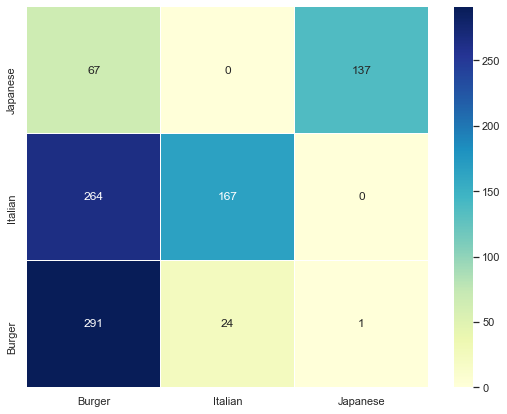

In [37]:
C= metrics.confusion_matrix(bus_reviews['category'],bus_reviews['clusters_km_3'].tolist())
DataC = pd.DataFrame(C)
col_assignment=[0,0,0]
# where cluster's max word is equal to pizza
col_assignment[maxWords.index('pizza')] = 'Italian'
col_assignment[maxWords.index('sushi')] = 'Japanese'
col_assignment[maxWords.index('burger')] = 'Burger'
DataC.columns = col_assignment
DataC.index = ['Japanese','Italian','Burger']
print (DataC)

sns.set(rc={'figure.figsize':(9,7)})
sns.heatmap(DataC, cmap ='YlGnBu', linewidths = 0.30, annot = True, fmt='g')

In [38]:
#            0    1    2
# Japanese   84    0  120
# Italian   252  179    0
# Burger    292   23    1
# στις γραμμες εχουμε τις πραγματικες τιμες. Δηαδη στην γραμμη japanese, το αθροισμα ειναι 204, στην
# γραμμη italian το αιροισμα ειναι 431 και στην γραμμη burger το αθροισμα ειναι 316.

<span style="color:black; font-weight:700;font-size:18px"> Εδώ δεν υπάρχουν κέντρα που να αντιστοιχούν σε κάποιο category απο πριν, οπότε το τί προσπάθησε να κάνει cluster θα πρεπει να ερμηνευτεί αλλιώς. Αρχικα το πρωτο πραγμα που φαινεται ειναι οτι ο cluster 2 προσπαθησε να κρατησει τα japanese restaurants και ο cluster 1 τα italians restaurants. Ήδη ξερουμε οτι υπαρχει συγχηση μεταξυ των italian/burger και ο cluster 0 εβαλε στο ιδιο cluster πολλα εστιατορια απο αυτες τις δυο κατηγοριες, ειναι ενα συμπλεγμα αυτων των δυο. </span>

            0    1    2
Japanese   84    0  120
Italian   252  179    0
Burger    292   23    1


<AxesSubplot:>

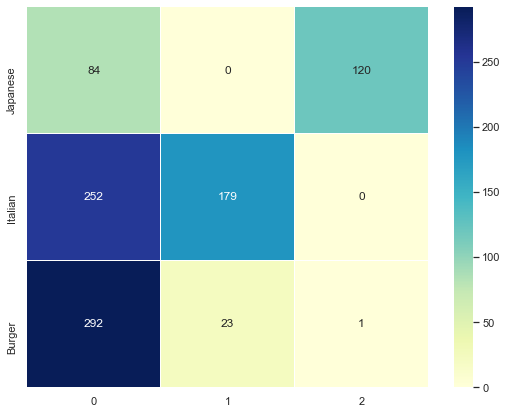

In [39]:
C= metrics.confusion_matrix(bus_reviews['category'],bus_reviews['clusters_am_ward_3'].tolist())
DataC = pd.DataFrame(C)
DataC.columns = ['0','1','2']
DataC.index = ['Japanese','Italian','Burger']
print (DataC)

sns.set(rc={'figure.figsize':(9,7)})
sns.heatmap(DataC, cmap ='YlGnBu', linewidths = 0.30, annot = True, fmt='g')

<span style="color:black; font-weight:700;font-size:18px"> Ίδιο σκεπτικό με τον παραπάνω αλγόριθμο, απλώς εδώ ο cluster των ιαπωνικών τα κατάφερε καλύτερα. </span>

            0    1    2
Japanese   20    0  184
Italian   258  168    5
Burger    286   25    5


<AxesSubplot:>

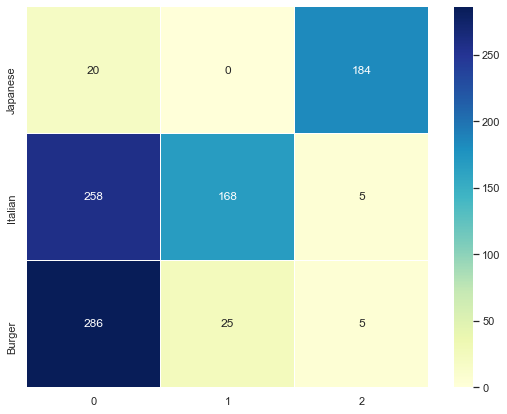

In [40]:
C= metrics.confusion_matrix(bus_reviews['category'],bus_reviews['clusters_am_cmpl_3'].tolist())
DataC = pd.DataFrame(C)
DataC.columns = ['0','1','2']
DataC.index = ['Japanese','Italian','Burger']
print (DataC)

sns.set(rc={'figure.figsize':(9,7)})
sns.heatmap(DataC, cmap ='YlGnBu', linewidths = 0.30, annot = True, fmt='g')

<span style="color:black; font-weight:700;font-size:18px"> Οι δύο αλγόριθμοι που ακολουθούν κάνανε και οι δύο έναν υπερ-cluster στον οποίο κρατάνε όλα τα εστιατόρια, δηλαδή αποτύγχανε. </span>

            0  1  2
Japanese  204  0  0
Italian   429  1  1
Burger    316  0  0


<AxesSubplot:>

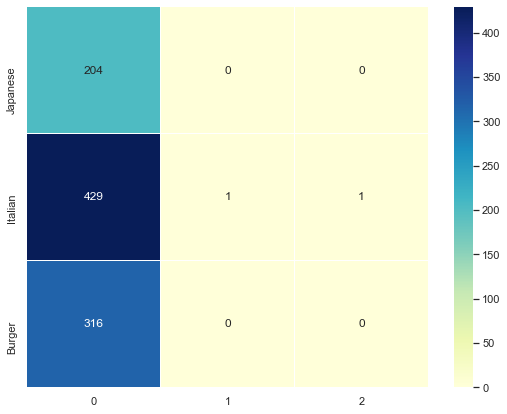

In [41]:
C= metrics.confusion_matrix(bus_reviews['category'],bus_reviews['clusters_am_avg_3'].tolist())
DataC = pd.DataFrame(C)
DataC.columns = ['0','1','2']
DataC.index = ['Japanese','Italian','Burger']
print (DataC)

sns.set(rc={'figure.figsize':(9,7)})
sns.heatmap(DataC, cmap ='YlGnBu', linewidths = 0.30, annot = True, fmt='g')

            0  1  2
Japanese  204  0  0
Italian   430  0  1
Burger    315  1  0


<AxesSubplot:>

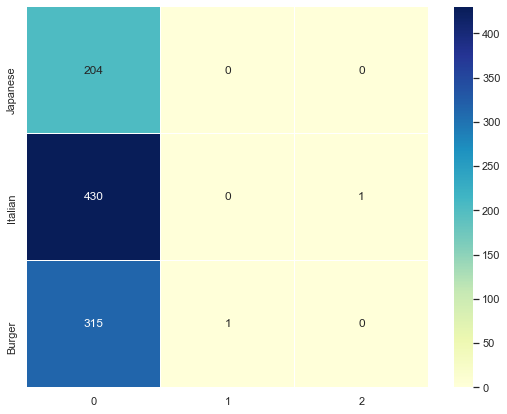

In [42]:
C= metrics.confusion_matrix(bus_reviews['category'],bus_reviews['clusters_am_sng_3'].tolist())
DataC = pd.DataFrame(C)
DataC.columns = ['0','1','2']
DataC.index = ['Japanese','Italian','Burger']
print (DataC)

sns.set(rc={'figure.figsize':(9,7)})
sns.heatmap(DataC, cmap ='YlGnBu', linewidths = 0.30, annot = True, fmt='g')

<span style="color:black; font-weight:700;font-size:18px">Τώρα θα πάρουμε τις 10 πιο συχνές λέξεις για κάθε cluster, ουσιαστικά τα columns με τις υψηλότερες τιμές.  </span>

In [43]:
kMeansCentroids = km.cluster_centers_
print(kMeansCentroids)
df = pd.DataFrame(kMeansCentroids, columns=feature_names)
#df.head

# Change the row indexes
df.index = ['0', '1', '2']

[[0.00815933 0.00578715 0.00772852 ... 0.00618059 0.00985923 0.00572958]
 [0.00729471 0.00363732 0.00557236 ... 0.00469698 0.00887999 0.0039329 ]
 [0.00583008 0.00346666 0.00722522 ... 0.01044493 0.0115828  0.00306176]]


<span style="color:black; font-weight:700;font-size:18px">Από την πρώτη γραμμή, από τον πρώτο cluster, βρίσκουμε τα columns με τις υψηλότερες τιμές,

In [44]:
rslt_df = df.sort_values(by = '0', axis = 1, ascending = False)
rslt_ll = rslt_df.iloc[0]
print(rslt_ll[:11])

burger      0.101653
fries       0.088407
italian     0.076292
pasta       0.066671
bar         0.062342
sandwich    0.059634
table       0.054530
dinner      0.050517
bread       0.048755
salad       0.044892
wine        0.043471
Name: 0, dtype: float64


<span style="color:black; font-weight:700;font-size:18px"> Το ίδιο και για την δεύτερη γραμμή, δεύτερο cluster τις 10 πιο συχνές λέξεις. </span>

In [45]:
rslt_df = df.sort_values(by = '1', axis = 1, ascending = False)
rslt_ll = rslt_df.iloc[0]
print(rslt_ll[:11])

pizza        0.022064
delivery     0.018952
crust        0.004458
wings        0.034915
pizzas       0.004046
pie          0.007904
slice        0.004529
fries        0.088407
salad        0.044892
pepperoni    0.001557
slices       0.005262
Name: 0, dtype: float64


<span style="color:black; font-weight:700;font-size:18px">Και τέλος για τον τρίτο cluster. </span>

In [46]:
rslt_df = df.sort_values(by = '2', axis = 1, ascending = False)
rslt_ll = rslt_df.iloc[0]
print(rslt_ll[:11])

sushi       0.005984
roll        0.014737
rolls       0.011077
rice        0.020964
tuna        0.008921
salmon      0.016903
spicy       0.025466
japanese    0.009310
fish        0.019167
soup        0.022018
chinese     0.008521
Name: 0, dtype: float64


<span style="color:black; font-weight:700;font-size:18px"> Το πρόβλημα που εμφανίζεται μεταξύ των ιταλικών και burger, η ίδια σύγχηση γίνεται και στις λέξεις, καθώς έχουν πολλές κοινές στις δέκα καλύτερες. Τα ιαπωνικά παραμένουν ξεχωριστά και ευδιάκριτα. </span>

<span style="color:black; font-weight:700;font-size:18px"> Precision, Recall και F1_score για τον K-means συνολικά. </span>

In [47]:
p = metrics.precision_score(bus_reviews['category'],bus_reviews['clusters_km_3'].tolist(), average='weighted')
print("Precision Score:",p)
r = metrics.recall_score(bus_reviews['category'],bus_reviews['clusters_km_3'].tolist(), average = 'weighted')
print("Recall Score:   ",r)
f = metrics.f1_score(bus_reviews['category'],bus_reviews['clusters_km_3'].tolist(), average = 'weighted')
print("F1 Score:       ",f)

Precision Score: 0.421773988997863
Recall Score:    0.24710830704521555
F1 Score:        0.2796254474371056


<span style="color:black; font-weight:700;font-size:18px"> Precision, Recall και F1_score για κάθε cluster του K-means. </span>

In [48]:
print("                 Cls_0,         Cls_1,        Cls_2")
p = metrics.precision_score(bus_reviews['category'],bus_reviews['clusters_km_3'].tolist(), average=None)
print("Precision Score:",p)
r = metrics.recall_score(bus_reviews['category'],bus_reviews['clusters_km_3'].tolist(), average = None)
print("Recall Score:   ",r)
f = metrics.f1_score(bus_reviews['category'],bus_reviews['clusters_km_3'].tolist(), average = None)
print("F1 Score:       ",f)

                 Cls_0,         Cls_1,        Cls_2
Precision Score: [0.10771704 0.87434555 0.00724638]
Recall Score:    [0.32843137 0.387471   0.00316456]
F1 Score:        [0.1622276  0.53697749 0.00440529]


<span style="color:black; font-weight:700;font-size:18px"> Precision, Recall και F1_score για τον Agglomerative συνολικά, χρησιμοποιώντας complete linkage. </span>

In [49]:
p = metrics.precision_score(bus_reviews['category'],bus_reviews['clusters_am_cmpl_3'].tolist(), average='weighted')
print("Precision Score:",p)
r = metrics.recall_score(bus_reviews['category'],bus_reviews['clusters_am_cmpl_3'].tolist(), average = 'weighted')
print("Recall Score:   ",r)
f = metrics.f1_score(bus_reviews['category'],bus_reviews['clusters_am_cmpl_3'].tolist(), average = 'weighted')
print("F1 Score:       ",f)

Precision Score: 0.41067229958575946
Recall Score:    0.20294426919032596
F1 Score:        0.2617223990623508


<span style="color:black; font-weight:700;font-size:18px"> Precision, Recall και F1_score για το κάθε cluster του Agglomerative, χρησιμοποιώντας complete linkage. </span>

In [50]:
print("                 Cls_0,         Cls_1,        Cls_2")
p = metrics.precision_score(bus_reviews['category'],bus_reviews['clusters_am_cmpl_3'].tolist(), average=None)
print("Precision Score:",p)
r = metrics.recall_score(bus_reviews['category'],bus_reviews['clusters_am_cmpl_3'].tolist(), average = None)
print("Recall Score:   ",r)
f = metrics.f1_score(bus_reviews['category'],bus_reviews['clusters_am_cmpl_3'].tolist(), average = None)
print("F1 Score:       ",f)

                 Cls_0,         Cls_1,        Cls_2
Precision Score: [0.03546099 0.87046632 0.0257732 ]
Recall Score:    [0.09803922 0.38979118 0.01582278]
F1 Score:        [0.05208333 0.53846154 0.01960784]


<span style="color:black; font-weight:700;font-size:18px"> Τα διαγράμματα SSE και Silhouette Coefficient. </span>

In [51]:
inertias = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(kmeans_data)
    inertias.append(kmeans.inertia_)

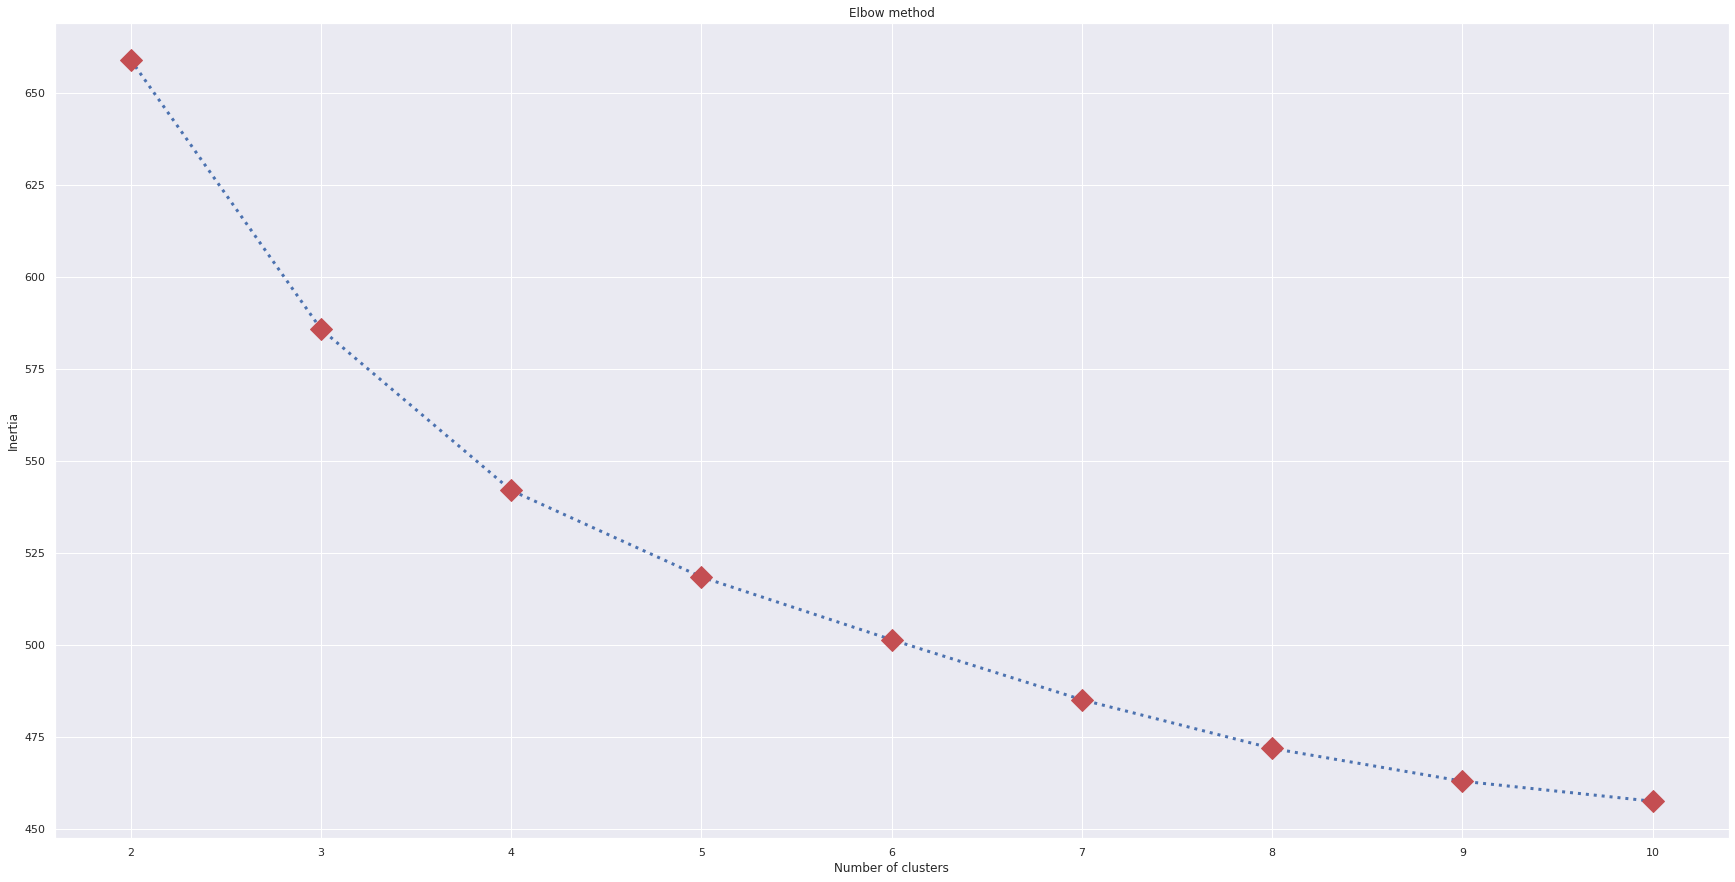

In [52]:
plt.figure(figsize=(30, 15))
plt.rcParams.update({'font.size': 22})
plt.plot(range(2,11), inertias, 'D:b', ms=15, mec = 'r', mfc = 'r', linewidth = 3)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
sns.reset_orig()
#sns.set()
plt.show()

In [53]:
inertias2 = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(kmeans_data)
    sil = metrics.silhouette_score(kmeans_data, kmeans.labels_, metric='euclidean')
    inertias2.append(sil)

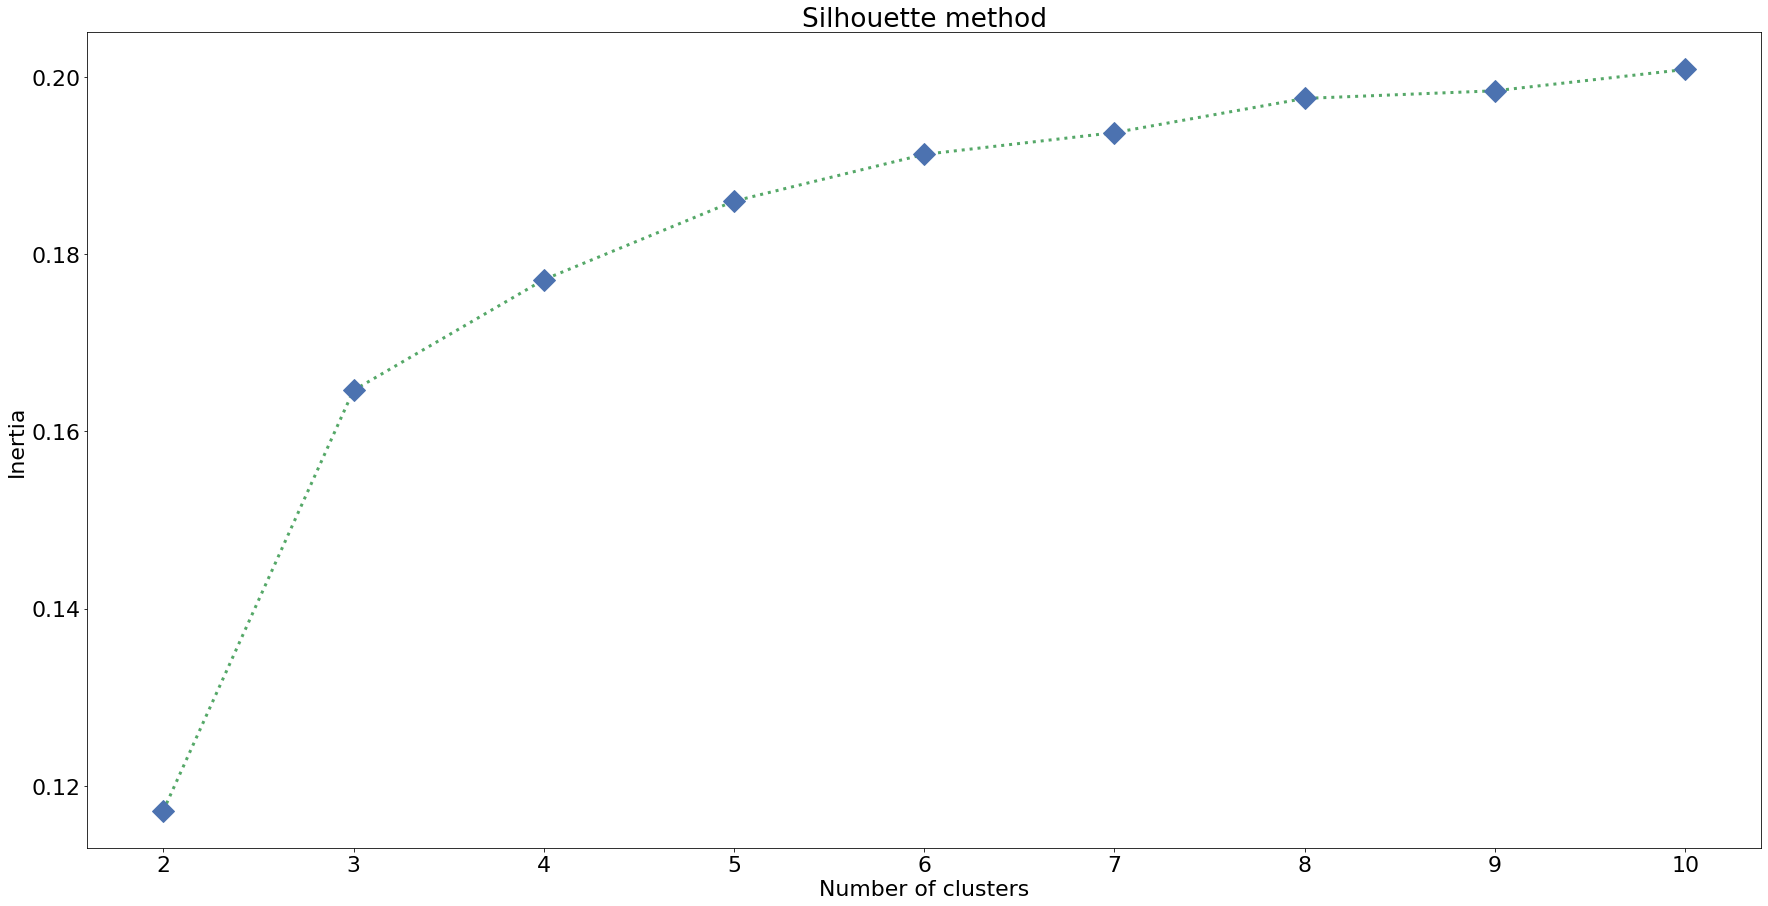

In [54]:
plt.figure(figsize=(30, 15))
plt.rcParams.update({'font.size': 22})
plt.plot(range(2,11), inertias2, 'D:g', ms=15, mec = 'b', mfc = 'b', linewidth = 3)
plt.title('Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
sns.reset_orig()
plt.show()

<span style="color:black; font-weight:700;font-size:18px"> Στο SSE διάγραμμα βλέπουμε ότι μετά το 7-8 η διαφόρα παραμένει σταθερή, δεν υπάρχουν πια μεγάλες αλλαγές ανα cluster. Στο Silhouette διάγραμμα, αρχικά οι τιμές είναι από -1 έως 1 και σε εμάς όλα τα cluster είναι άνω του 0, η τιμή για 9 clusters είναι η υψηλότερη. Οπότε με αυτές τις δύο πληροφορίες, διαλέγω το 9 ώς ο κατάλληλος αριθμός των cluster. </span>

<span style="color:black; font-weight:700;font-size:18px"> Crosstable για n_clusters = 9 </span>

In [55]:
km = KMeans(n_clusters = 9)
# Cluster using SOME columns
kmeans = km.fit(kmeans_data)
bus_reviews['clusters_km_9'] = km.labels_

<span style="color:black; font-weight:700;font-size:18px"> Εδώ φαίνεται σαν να έχει αντιμετωπιστεί κάπως το πρόβλημα με τα italian και τα burger. Τα ιαπωνικά δεν έχουν θέμα, οι cluster 2,3 μπόρεσαν και τα φώλιασαν καλά. Οι clusters 1,6 παραμένουν να κρατάνε εστιατόρια από αυτές τις δύο κατηγορίες, αλλά είναι οι μόνοι αμφίβολοι clusters. Οι cluster 0,7,8 κρατάνε πολλά burger εστιατόρια, ενώ οι cluster 4,5 κρατάνε ένα πολύ μεγάλο πλήθος των italian. </span>

           0    1   2   3   4    5   6    7   8
Japanese   6    0   1  70   0  126   0    0   1
Italian   27  165  48   4   0    0   0  167  20
Burger    59   24  48   2  61    1  92    3  26


<AxesSubplot:>

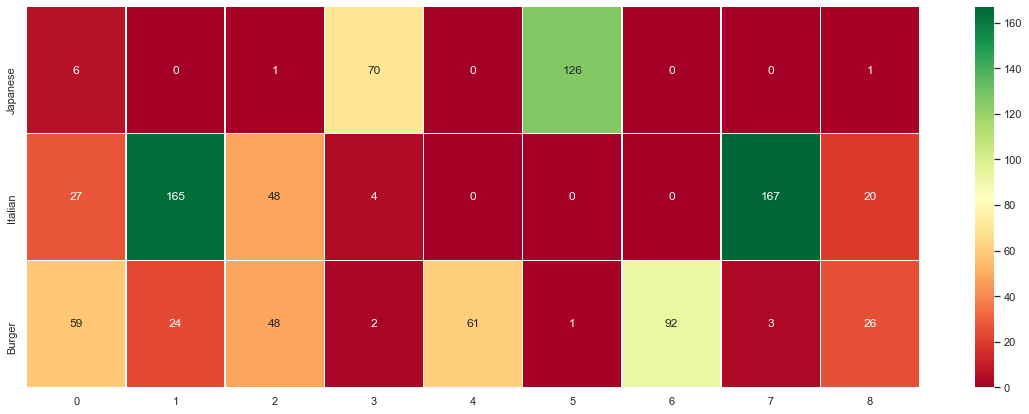

In [56]:
C= metrics.confusion_matrix(bus_reviews['category'],bus_reviews['clusters_km_9'].tolist())
DataC = pd.DataFrame(C)
DataC.columns = ['0','1','2','3','4','5','6','7','8']
DataC.index = ['Japanese','Italian','Burger','3','4','5','6','7','8']
DataC.drop(['3','4','5','6','7','8'], inplace = True)
print (DataC)
#plt.pcolor(DataC,cmap=plt.cm.coolwarm)
sns.set(rc={'figure.figsize':(20,7)})
sns.heatmap(DataC, cmap ='RdYlGn', linewidths = 0.30, annot = True, fmt='g')

In [57]:
kMeansCentroids = km.cluster_centers_
#print(kMeansCentroids)
df2 = pd.DataFrame(kMeansCentroids, columns=feature_names)
#.head

# Change the row indexes
df2.index = ['0', '1', '2','3','4','5','6','7','8']

<span style="color:black; font-weight:700;font-size:18px"> Οι 10 καλύτερες λέξεις από τα cluster 0,7,8 των burger εστιατορίων όπως είπαμε, είναι ξεχωριστές από τα clusters των 4,5-των ιταλικών. Αυτές οι δύο οι κατηγορίες κατάφεραν πολύ καλύτερα να διαφέρουν. </span>

In [58]:
for i in range(9):
    rslt_df = df2.sort_values(by = str(i), axis = 1, ascending = False)
    rslt_ll = rslt_df.iloc[0]
    print("TOP 10 WORDS OF CLUSTER:", i)
    print(rslt_ll[:11])
    print("############################")

TOP 10 WORDS OF CLUSTER: 0
bar          0.275900
drinks       0.151865
beer         0.143926
burger       0.115135
wings        0.112374
drink        0.090862
table        0.090794
fries        0.089183
bartender    0.083787
server       0.073336
waitress     0.067103
Name: 0, dtype: float64
############################
TOP 10 WORDS OF CLUSTER: 1
pizza        0.026989
delivery     0.004436
crust        0.004254
wings        0.112374
pizzas       0.006404
pie          0.011765
slice        0.003780
fries        0.089183
salad        0.057254
slices       0.004975
pepperoni    0.000556
Name: 0, dtype: float64
############################
TOP 10 WORDS OF CLUSTER: 2
sandwich       0.041477
cheesesteak    0.016387
hoagie         0.001761
sandwiches     0.013781
fries          0.089183
steak          0.033342
italian        0.011428
bread          0.029399
meat           0.019646
wings          0.112374
provolone      0.002142
Name: 0, dtype: float64
############################
TOP 10 WORDS